<a href="https://colab.research.google.com/github/crossholo/Provision/blob/main/fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
plt.style.use("seaborn")
import seaborn

<ipython-input-1-c9c9998d969b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
giorni_anno=253
df=yf.download("^SP500TR")["Adj Close"].pct_change(giorni_anno).dropna()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

Date
1989-01-03    0.115733
1989-01-04    0.120648
1989-01-05    0.121916
1989-01-06    0.115156
1989-01-09    0.197495
                ...   
2024-03-22    0.328514
2024-03-25    0.346522
2024-03-26    0.338644
2024-03-27    0.342778
2024-03-28    0.342107
Name: Adj Close, Length: 8878, dtype: float64

In [ ]:
primo_estratto=random.randint(0,len(df)-3*giorni_anno-1)
secondo_estratto=primo_estratto+giorni_anno
terzo_estratto=secondo_estratto+giorni_anno
print(df.index[primo_estratto],"->",round(df[primo_estratto]*100),"%")
print(df.index[secondo_estratto],"->",round(df[secondo_estratto]*100),"%")
print(df.index[terzo_estratto],"->",round(df[terzo_estratto]*100),"%")

2020-03-03 00:00:00 -> 9 %
2021-03-04 00:00:00 -> 28 %
2022-03-04 00:00:00 -> 16 %


In [ ]:
quante_simulazioni=100
upper=len(df)-3*giorni_anno-1
m=np.zeros((100,quante_simulazioni))
m[0,:]=1
for c in range(quante_simulazioni):
    for t in range(1,100,3):
        e1=random.randint(0,upper)
        e2=e1+giorni_anno
        e3=e2+giorni_anno
        # print(t,c)
        m[t,c]=m[t-1,c]*(1+df[e1])
        m[t+1,c]=m[t,c]*(1+df[e2])
        m[t+2,c]=m[t+1,c]*(1+df[e3])

In [ ]:
m

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.12945426e+00, 1.18376883e+00, 8.02179519e-01, ...,
        1.25435599e+00, 9.17942727e-01, 1.24832740e+00],
       [1.53835193e+00, 1.25418225e+00, 8.90942447e-01, ...,
        1.02904889e+00, 7.92184047e-01, 1.52957717e+00],
       ...,
       [7.28836211e+04, 9.95143576e+02, 1.58382684e+04, ...,
        4.91627292e+03, 1.05657143e+03, 6.51774227e+03],
       [8.56250648e+04, 1.33531478e+03, 1.66003411e+04, ...,
        5.53779175e+03, 1.16385212e+03, 8.96354531e+03],
       [1.04377108e+05, 1.13766642e+03, 1.94329194e+04, ...,
        7.41707948e+03, 1.26795536e+03, 1.10969387e+04]])

<Axes: >

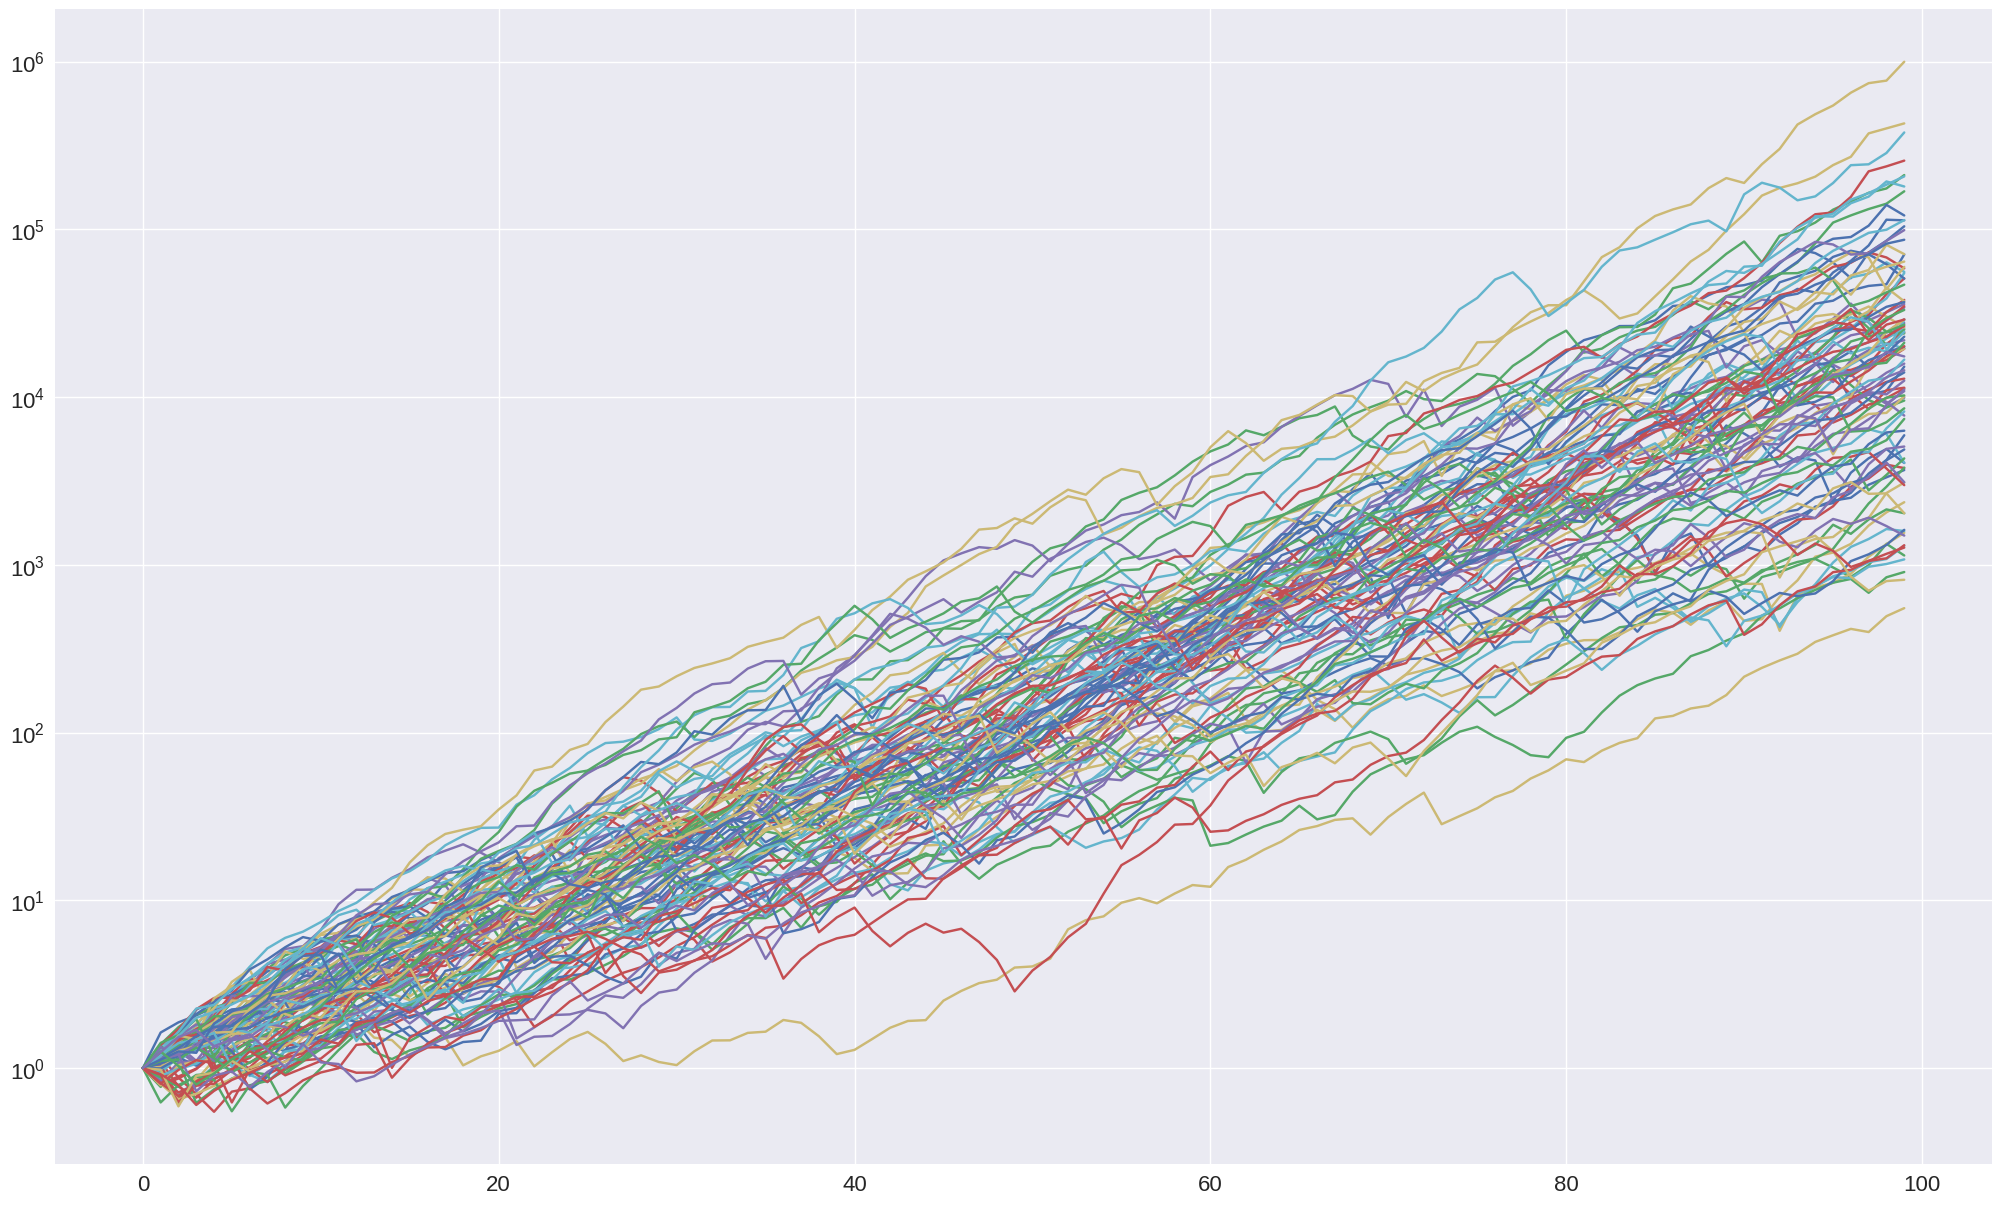

In [ ]:
pd.DataFrame(m).plot(legend=None,logy=True,fontsize=16,figsize=(25,15))

In [ ]:
quante_simulazioni=10000
upper=len(df)-3*giorni_anno-1
md=np.zeros((100,quante_simulazioni))
md[0,:]=1
m=np.zeros((100,quante_simulazioni))
m[0,:]=1
for c in range(quante_simulazioni):
    for t in range(1,100,3):
        e1=random.randint(0,upper)
        e2=e1+giorni_anno
        e3=e2+giorni_anno
        # print(t,c)
        md[t,c]=1+df[e1]
        md[t+1,c]=1+df[e2]
        md[t+2,c]=1+df[e3]
        m[t,c]=m[t-1,c]*(1+df[e1])
        m[t+1,c]=m[t,c]*(1+df[e2])
        m[t+2,c]=m[t+1,c]*(1+df[e3])

# Iniziamo finalmente l'analisi

In [ ]:
capitale=700000
prelievo=2000*13
inflazione=0.03
bollo=0.002
anni_rendita=51 # per quanti anni resti in pensione, massimo 99!

ATTENZIONE. Rispetto al video ho aggiunto:
1. imposta di bollo
2. la tassa sulla tassa, dato che sto usando i soldi investiti per pagare le tasse

In [ ]:
prelievi=np.zeros((100,))
prelievi[0]=prelievo
for t in range(1,100):
    prelievi[t]=prelievo*(1+inflazione)**t

fire=np.zeros((100,quante_simulazioni))
fire[0,:]=capitale-prelievi[0]
for t in range(1,100):
    tassa=np.zeros((quante_simulazioni,))
    tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
    tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
    fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

In [ ]:
fire

array([[ 6.74000000e+05,  6.74000000e+05,  6.74000000e+05, ...,
         6.74000000e+05,  6.74000000e+05,  6.74000000e+05],
       [ 8.28361937e+05,  4.08669116e+05,  7.24243927e+05, ...,
         7.01263363e+05,  8.37764426e+05,  7.82769251e+05],
       [ 1.04967792e+06,  5.60068959e+05,  6.50042185e+05, ...,
         8.22535603e+05,  9.10673199e+05,  7.76836194e+05],
       ...,
       [ 9.34083896e+08,  1.77565922e+09, -7.33512357e+08, ...,
         1.71851818e+08,  1.83971917e+09,  2.95955214e+10],
       [ 1.32807959e+09,  1.96752532e+09, -8.15563653e+08, ...,
         1.94738825e+08,  2.28294298e+09,  3.35406329e+10],
       [ 1.29849760e+09,  2.09210810e+09, -8.36959535e+08, ...,
         1.75804343e+08,  2.79668421e+09,  4.21906109e+10]])

In [ ]:
pd.Series(fire[anni_rendita,:]>=0).value_counts()/quante_simulazioni*100

True     80.61
False    19.39
dtype: float64

In [ ]:
summaryTable=pd.DataFrame(np.zeros((50,20)),columns=list(range(100000,2000001,100000)),index=list(range(1,51)))

In [ ]:
for c in range(100000,2000001,100000):
    fire[0,:]=c
    for t in range(1,100):
        tassa=np.zeros((quante_simulazioni,))
        tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
        tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
        fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

    for a in range(1,51):
        summaryTable.loc[[a],[c]]=round((fire[a,:]>=0).mean(),2)


<Axes: >

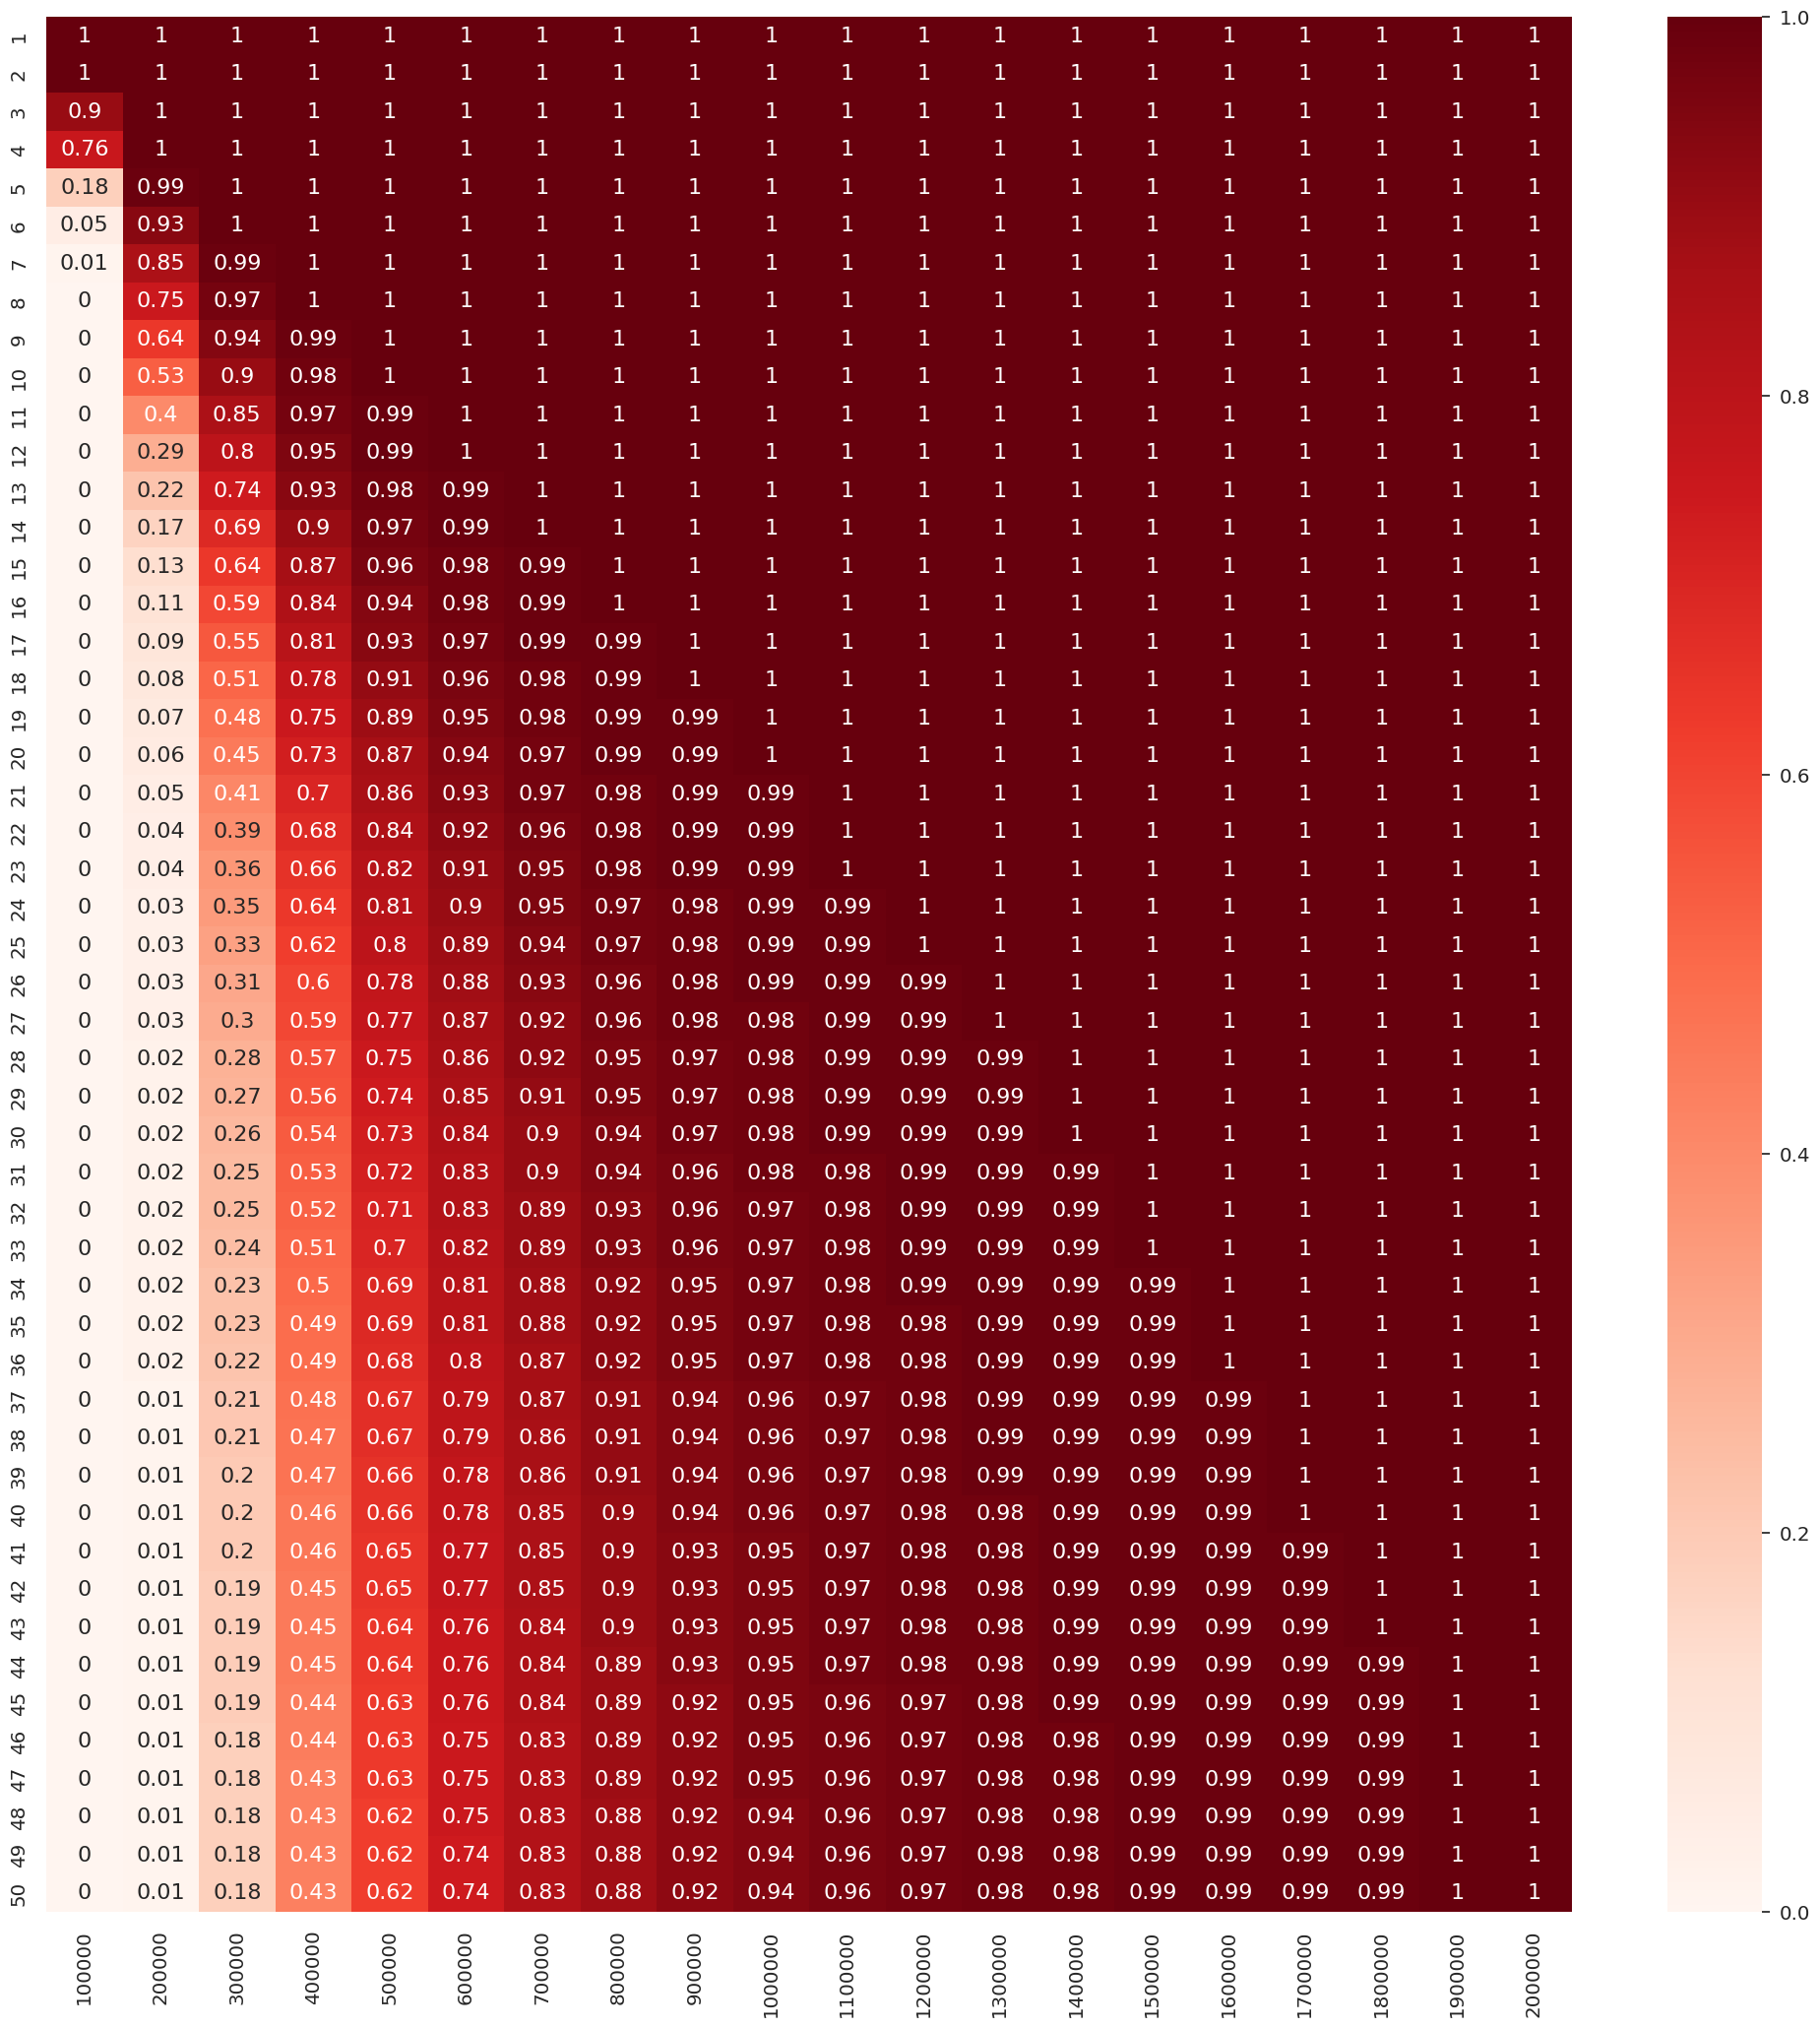

In [ ]:
plt.figure(figsize=(25,25))
seaborn.set(font_scale=1.3)
seaborn.heatmap(summaryTable,cmap="Reds", annot=True, annot_kws={"size":16})

# E inseriamo anche la pensione

In [ ]:
capitale=700000
prelievo=2000*13
inflazione=0.03
bollo=0.002
anni_rendita=20 # la somma dei due anni_rendita massimo 99
prelievo2=800*13
anni_rendita2=30 # la somma dei due anni_rendita massimo 99

In [ ]:
prelievi=np.zeros((100,))
prelievi[0]=prelievo
for t in range(1,anni_rendita):
    prelievi[t]=prelievo*(1+inflazione)**t
for t in range(anni_rendita,100):
    prelievi[t]=prelievo2*(1+inflazione)**t

fire=np.zeros((100,quante_simulazioni))
fire[0,:]=capitale
for t in range(1,100):
    tassa=np.zeros((quante_simulazioni,))
    tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
    tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
    fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

In [ ]:
fire

array([[ 7.00000000e+05,  7.00000000e+05,  7.00000000e+05, ...,
         7.00000000e+05,  7.00000000e+05,  7.00000000e+05],
       [ 8.61427776e+05,  4.25466857e+05,  7.53253619e+05, ...,
         7.29376238e+05,  8.71196082e+05,  8.14060204e+05],
       [ 1.09283388e+06,  5.84223541e+05,  6.77203131e+05, ...,
         8.56710263e+05,  9.48235323e+05,  8.09069041e+05],
       ...,
       [ 2.02686726e+09,  3.12183521e+09, -3.48228677e+08, ...,
         3.49156014e+09,  4.20832914e+09,  3.31953032e+10],
       [ 2.88292441e+09,  3.46002468e+09, -3.87134319e+08, ...,
         3.96923863e+09,  5.22339810e+09,  3.76207284e+10],
       [ 2.81987026e+09,  3.68000245e+09, -3.97241692e+08, ...,
         3.59640894e+09,  6.40008131e+09,  4.73234177e+10]])

In [ ]:
pd.Series(fire[anni_rendita+anni_rendita2,:]>=0).value_counts()/quante_simulazioni*100

True     92.56
False     7.44
dtype: float64

In [ ]:
summaryTable=pd.DataFrame(np.zeros((50,20)),columns=list(range(100000,2000001,100000)),index=list(range(1,51)))

In [ ]:
for c in range(100000,2000001,100000):
    fire[0,:]=c
    for t in range(1,100):
        tassa=np.zeros((quante_simulazioni,))
        tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
        tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
        fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

    for a in range(1,51):
        summaryTable.loc[[a],[c]]=round((fire[a,:]>=0).mean(),2)


<Axes: >

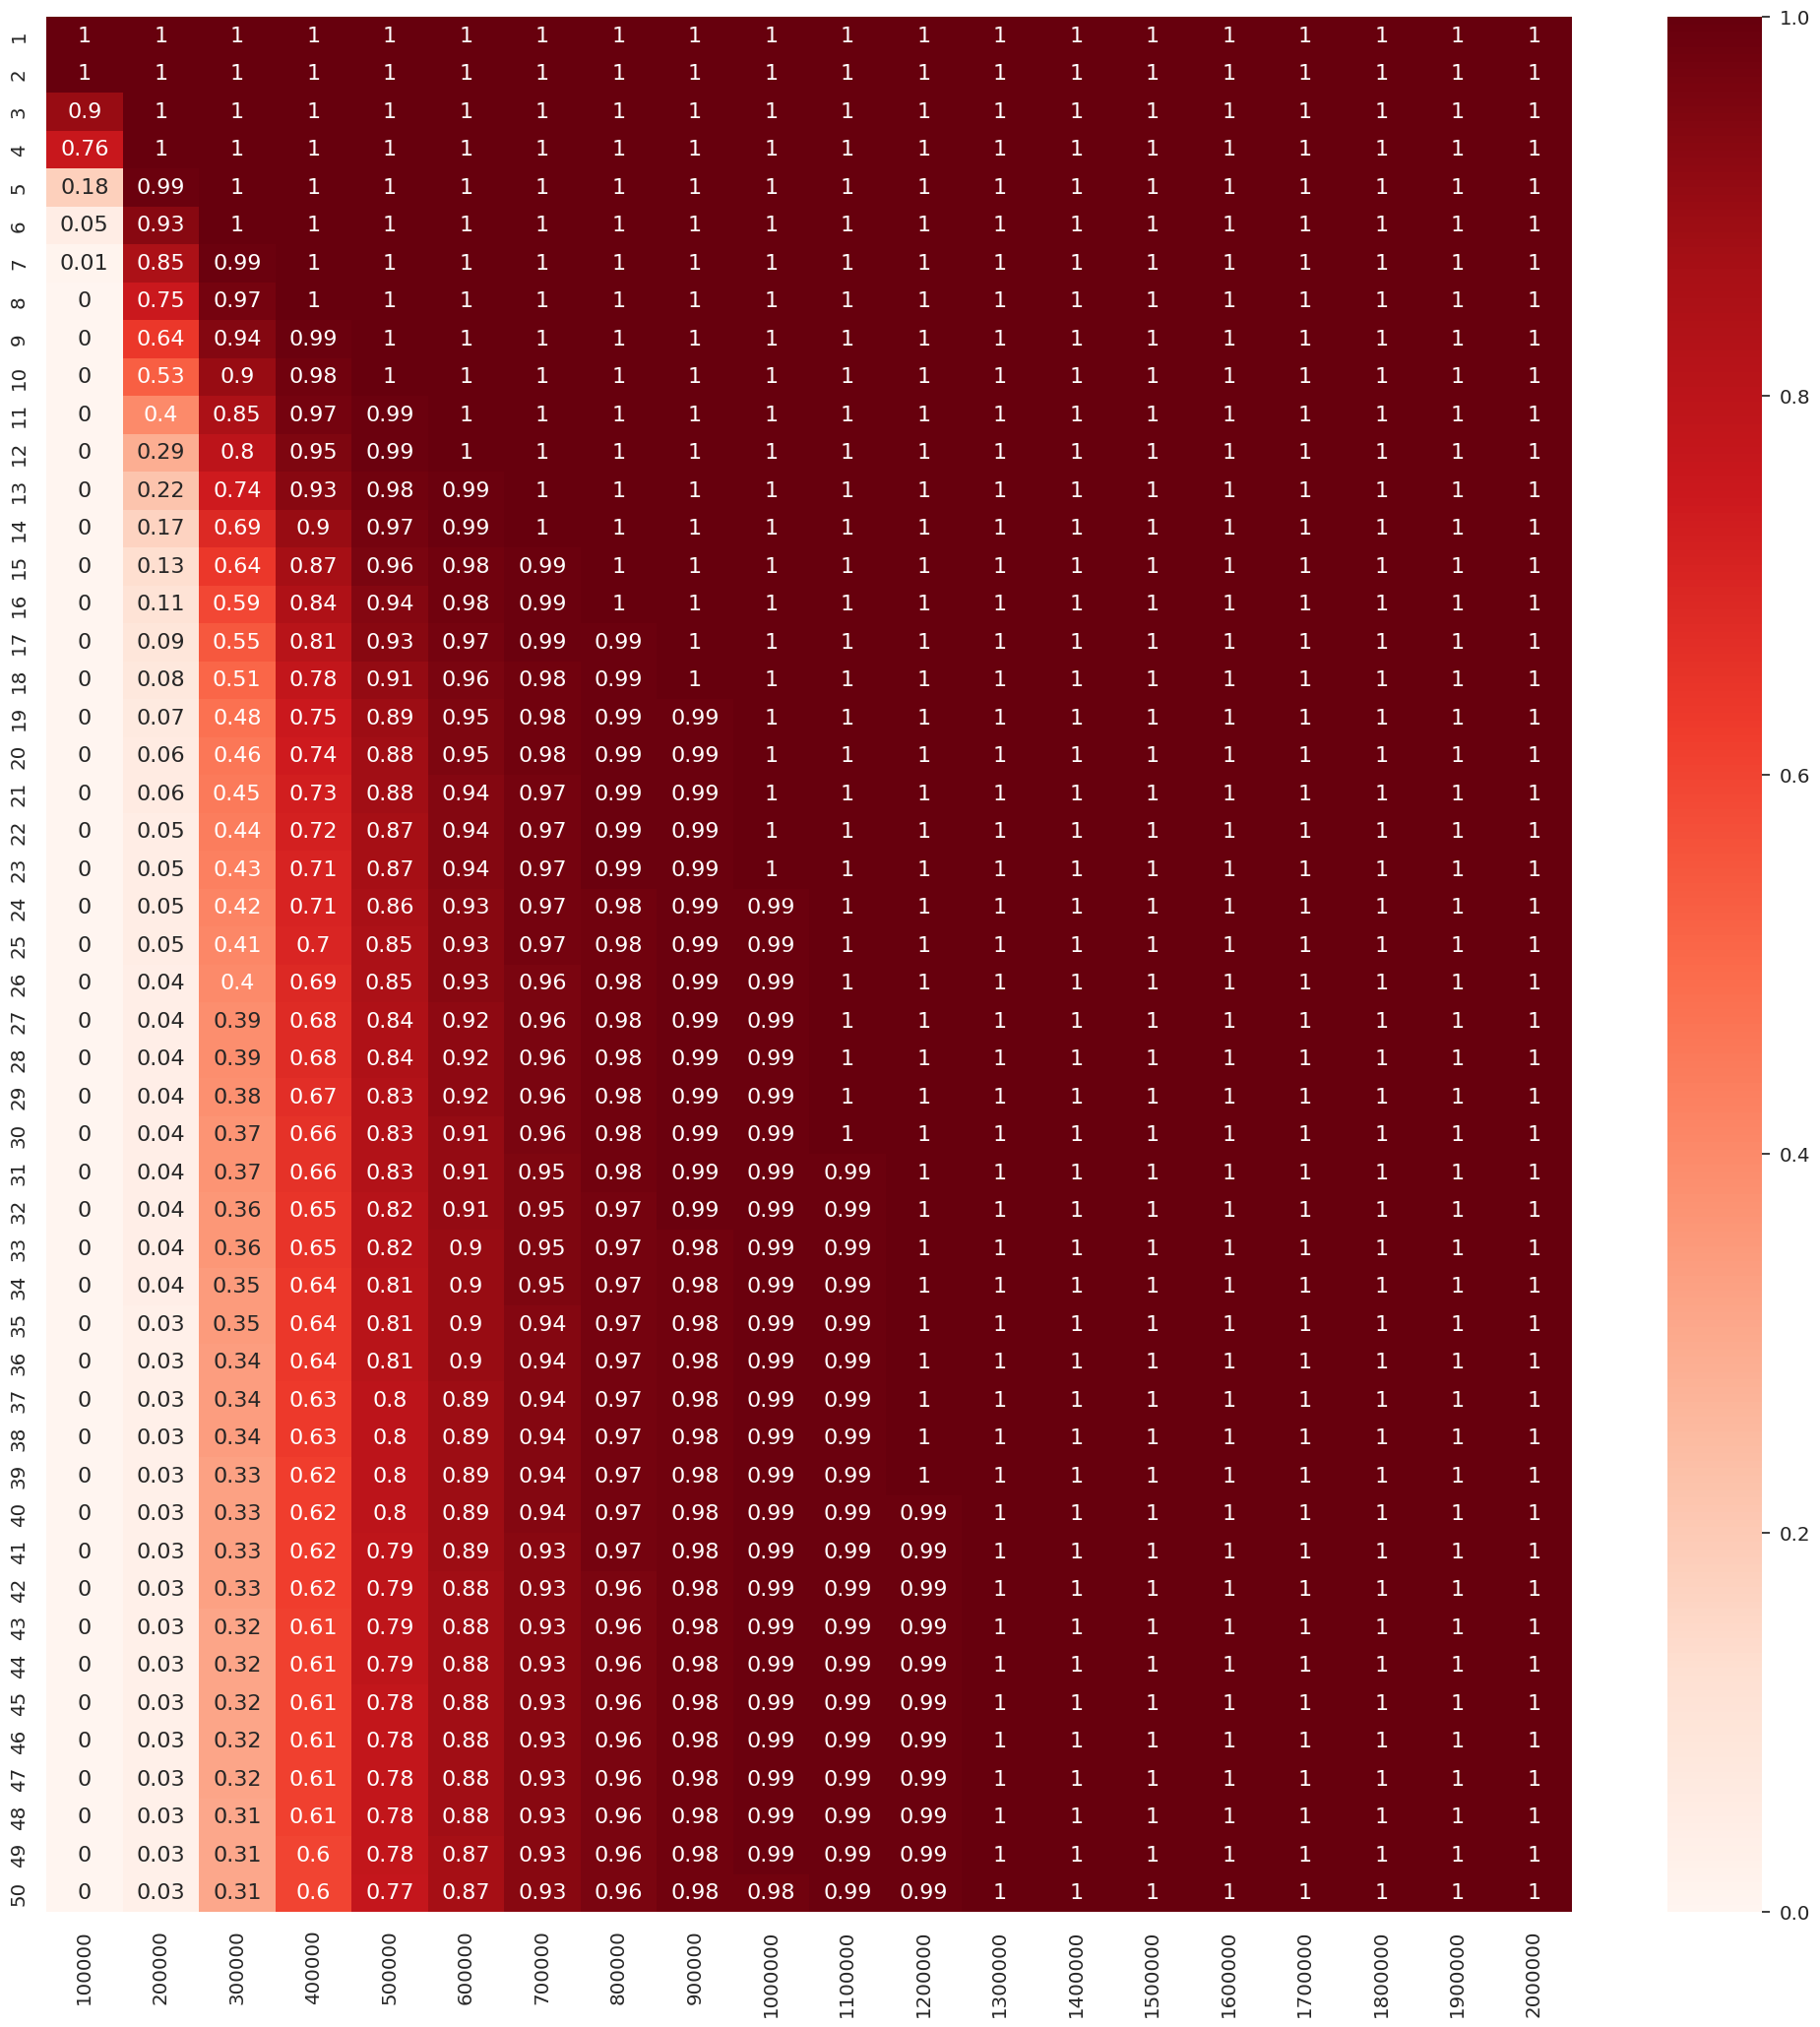

In [ ]:
plt.figure(figsize=(25,25))
seaborn.set(font_scale=1.3)
seaborn.heatmap(summaryTable,cmap="Reds", annot=True, annot_kws={"size":16})